<a href="https://colab.research.google.com/github/ssawant/CNN/blob/main/Face_Detection_with_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to Perform Face Detection with Deep Learning](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)

This Kernel is an implementation of paper/article publish by Jason Brownlee. All credit to original publisher and ipazc@unileon.es

In [ ]:
# Download test images
!wget -O /tmp/test1.jpg "https://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg"
!wget -O /tmp/test2.jpg "https://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg"

In [6]:
import PIL

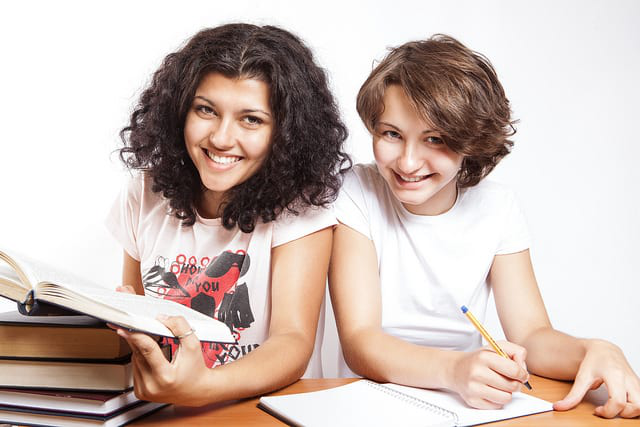

In [22]:
PIL.Image.open('/tmp/test1.jpg')

In [9]:
!pip install opencv-python

In [10]:
#check opencv version
import cv2
print(cv2.__version__)

4.1.2


OpenCV provides the CascadeClassifier class that can be used to create a cascade classifier for face detection.

In [ ]:
!wget -O /content/haarcascade_frontalface_default.xml "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

In [34]:
from cv2 import CascadeClassifier
from cv2 import imread
from cv2 import rectangle

#from cv2 import imshow 
# DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# to crash; see https://github.com/jupyter/notebook/issues/3935.

from google.colab.patches import cv2_imshow

In [35]:
classifier = CascadeClassifier("haarcascade_frontalface_default.xml")

In [36]:
# load photograph
pixels = imread('/tmp/test1.jpg')

In [44]:
# perform face detection 
bboxes = classifier.detectMultiScale(pixels)

# print bonding box for each detected face
for box in bboxes:
  print(box)

box1, box2 = bboxes

[173  74 108 108]
[363 104  97  97]


In [ ]:
# extract for box1
x, y, width, height = box1
x2, y2 = x + width, y + height

# extract for box2
x1, y1, width1, height1 = box2
x3, y3 = x1 + width1, y1 + height1

# draw rectangle over pixels
rectangle(pixels, (x,y), (x2, y2), (0, 0, 255), 1)
rectangle(pixels, (x1,y1), (x3, y3), (0, 0, 255), 1)

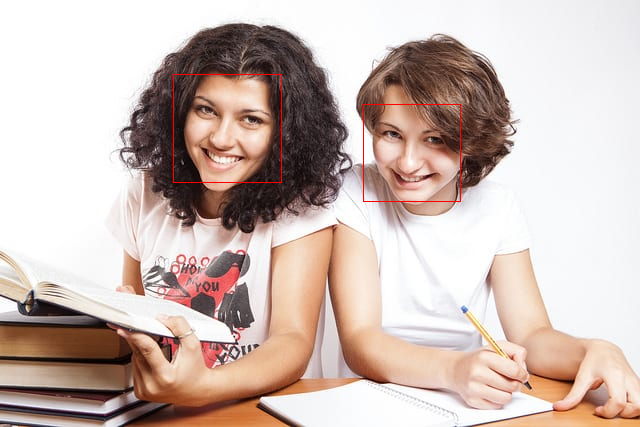

In [47]:
# show the image
cv2_imshow(pixels)

# Face detection using deep learning

### Multi-Task Cascaded Convolutional Neural Network (MTCNN)

The network uses a cascade structure with three networks; first the image is rescaled to a range of different sizes (called an image pyramid), then the first model (Proposal Network or P-Net) proposes candidate facial regions, the second model (Refine Network or R-Net) filters the bounding boxes, and the third model (Output Network or O-Net) proposes facial landmarks.


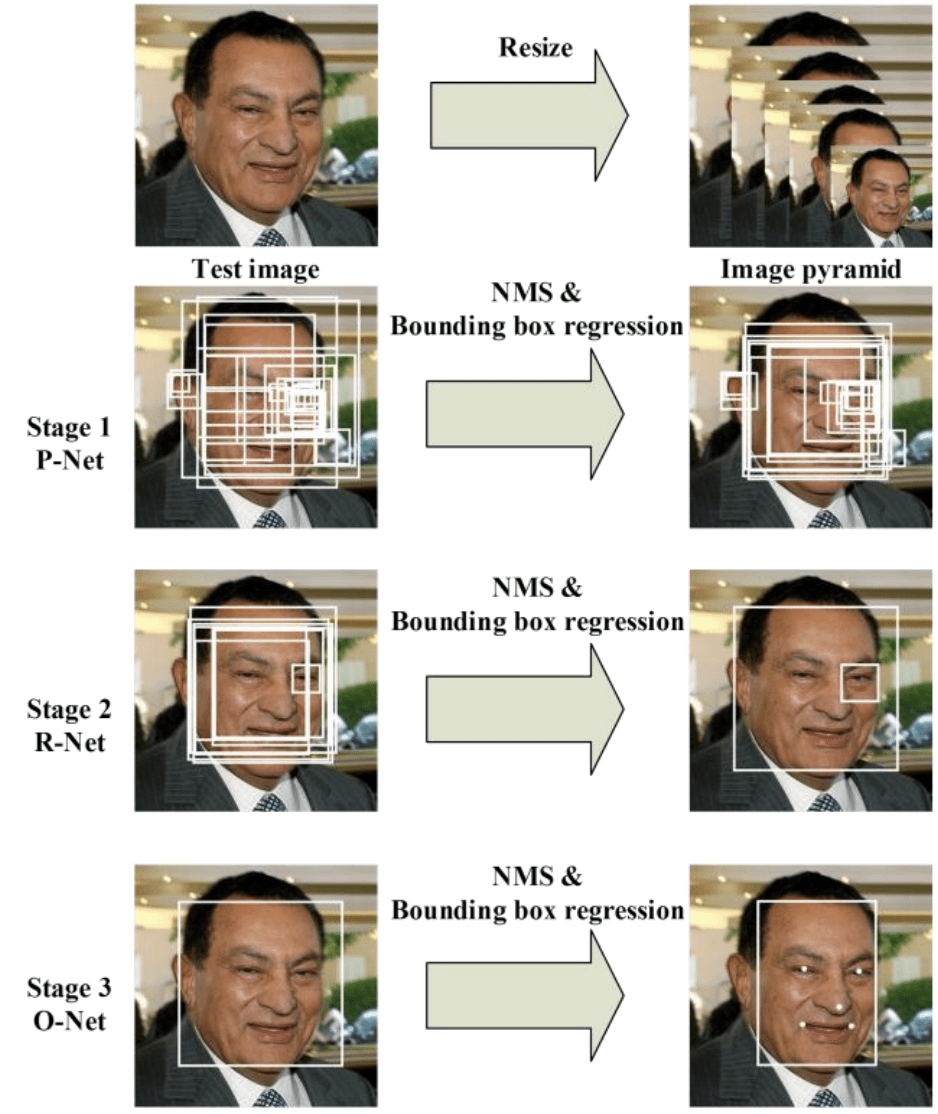



In [ ]:
!pip install mtcnn

In [49]:
!pip show mtcnn

Name: mtcnn
Version: 0.1.0
Summary: Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow
Home-page: http://github.com/ipazc/mtcnn
Author: Iván de Paz Centeno
Author-email: ipazc@unileon.es
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: opencv-python, keras
Required-by: 


In [50]:
# face detection with mtcnn on a photograph
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

In [52]:
# load image from file
pixels = plt.imread('/tmp/test1.jpg')

In [54]:
# create detector, using default weight
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)

In [55]:
for face in faces:
  print(face)

{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 90, 117], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


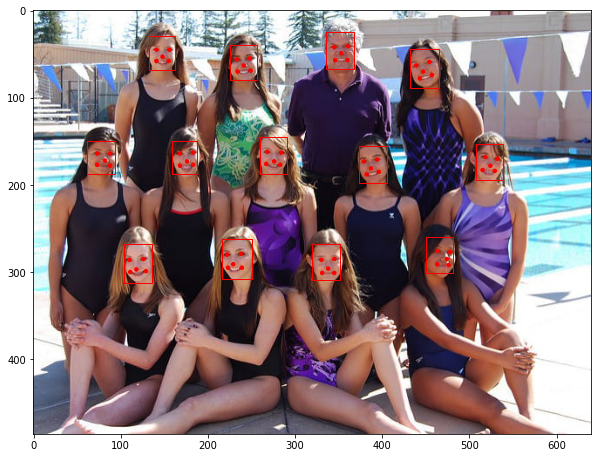

In [75]:
# face detection with mtcnn
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN

# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = plt.imread(filename)
  # plot the image
  plt.imshow(data)
  # get context for drawing boxes
  ax = plt.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create shape
    rect =  Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # draw the dot
    for key, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)

  # show plot
  plt.show()


plt.figure(figsize=(10,12))

filename = "/tmp/test2.jpg"

# load image from file
pixels = plt.imread(filename)

# create detector, using default weight
detector = MTCNN()

# detech faces in the image
faces = detector.detect_faces(pixels)

# display faces on the original image
draw_image_with_boxes(filename, faces)


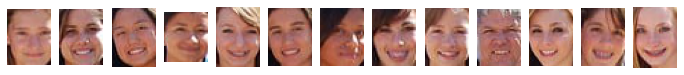

In [79]:
# draw each face separately

def draw_faces(filename, result_list):
  # load the image
  data = plt.imread(filename)
  # plot each face as subplot
  for i in range(len(result_list)):
    # get coordinate
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    # define subplot
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    # plot face
    plt.imshow(data[y1:y2, x1:x2])
  # show the plot
  plt.show()

plt.figure(figsize=(12,12))

filename = "/tmp/test2.jpg"

# load image from file
pixels = plt.imread(filename)

# create detector, using default weight
detector = MTCNN()

# detech faces in the image
faces = detector.detect_faces(pixels)

# display faces on the original image
draw_faces(filename, faces)